In [2]:
!wget https://itriaihub.blob.core.windows.net/github-download-resources/repository/ITRI-AI-Hub/datasets/HardHat_Dataset.YOLO.zip
!unzip HardHat_Dataset.YOLO.zip

--2024-11-11 08:19:22--  https://itriaihub.blob.core.windows.net/github-download-resources/repository/ITRI-AI-Hub/datasets/HardHat_Dataset.YOLO.zip
Resolving itriaihub.blob.core.windows.net (itriaihub.blob.core.windows.net)... 20.209.42.36
Connecting to itriaihub.blob.core.windows.net (itriaihub.blob.core.windows.net)|20.209.42.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3705720 (3.5M) [application/x-zip-compressed]
Saving to: ‘HardHat_Dataset.YOLO.zip’

HardHat_Dataset.YOL 100%[===================>]   3.53M  1.58MB/s    in 2.2s    

2024-11-11 08:19:25 (1.58 MB/s) - ‘HardHat_Dataset.YOLO.zip’ saved [3705720/3705720]

Archive:  HardHat_Dataset.YOLO.zip
   creating: HardHat_Dataset.YOLO/
  inflating: HardHat_Dataset.YOLO/data.yaml  
  inflating: HardHat_Dataset.YOLO/README.roboflow.txt  
   creating: HardHat_Dataset.YOLO/test/
   creating: HardHat_Dataset.YOLO/test/images/
  inflating: HardHat_Dataset.YOLO/test/images/000008_jpg.rf.8ddEpaD8kjf9Wwgm1P3I.j

In [3]:
#optional
!git clone https://github.com/R300-AI/AutoAugment.git
!pip install -r AutoAugment/requirements.txt

Cloning into 'AutoAugment'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 66 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 27.71 KiB | 859.00 KiB/s, done.
Resolving deltas: 100% (17/17), done.


https://huggingface.co/spaces/qubvel-hf/albumentations-demo

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


summary the samples...
process each samples limited to 0.8571428571428571 seconds.


100%|██████████| 70/70 [04:31<00:00,  3.87s/it]


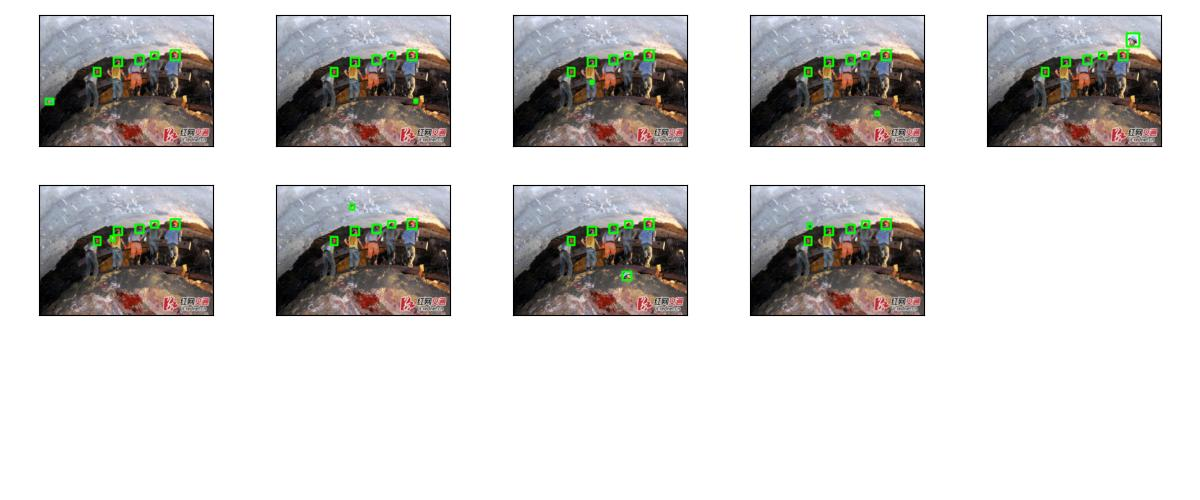

In [4]:
from AutoAugment.augmentors import ObjectAugmentor
from IPython.display import display, Image
import albumentations as A
import warnings, os

warnings.simplefilter("ignore")

augmentor = ObjectAugmentor(maximum_size = 16, maximum_process_second = 60)
NEW_DATASET_PATH = augmentor.fit('/content/HardHat_Dataset.YOLO', [A.Blur(p=0.8), A.CLAHE(p=0.8), A.GaussNoise(p=0.8), A.HorizontalFlip(p=0.5), A.PixelDropout(p=0.8),
                                      A.RandomBrightnessContrast(p=0.9), A.RandomShadow(p=0.8, shadow_intensity_range=(0.6, 0.9)),
                                      A.BBoxSafeRandomCrop(p=.7), A.ColorJitter(p=.8)] , save=True, verbose=True)

log = os.listdir(f"{NEW_DATASET_PATH}/log")[-1]
display(Image(filename=f"{NEW_DATASET_PATH}/log/{log}"))

In [5]:
!pip install ultralytics
from ultralytics import YOLO

version = 'yolov8n'   # @param ['yolov5n', 'yolov8n', 'yolo11n']
model = YOLO(f'{version}.pt')
model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 14.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 51.8MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
results = model.train(data='/content/HardHat_Dataset.YOLO/data.yaml', epochs=100)
results.results_dict

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/HardHat_Dataset.YOLO/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 9.52MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/HardHat_Dataset.YOLO/train/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 783.16it/s]

train: New cache created: /content/HardHat_Dataset.YOLO/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/HardHat_Dataset.YOLO/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 720.34it/s]

val: New cache created: /content/HardHat_Dataset.YOLO/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.871      4.066      1.553         57        640: 100%|██████████| 5/5 [01:06<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.39s/it]

                   all         20         65     0.0023      0.463    0.00663     0.0032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.571      3.746      1.333         35        640: 100%|██████████| 5/5 [00:55<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.43s/it]

                   all         20         65    0.00334      0.541     0.0625     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.558      2.897      1.191         50        640: 100%|██████████| 5/5 [00:59<00:00, 11.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.59s/it]

                   all         20         65     0.0047      0.581     0.0972     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.355      1.938      1.141         30        640: 100%|██████████| 5/5 [00:55<00:00, 11.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]

                   all         20         65     0.0109      0.767      0.211      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.432      1.829      1.168         49        640: 100%|██████████| 5/5 [00:55<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.50s/it]

                   all         20         65     0.0126       0.93      0.286      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.388      1.752      1.099         39        640: 100%|██████████| 5/5 [00:54<00:00, 10.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.16s/it]

                   all         20         65     0.0128      0.933      0.294      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G       1.37      1.711      1.119         37        640: 100%|██████████| 5/5 [00:55<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.61s/it]

                   all         20         65     0.0125      0.952      0.376      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.349      1.576      1.109         30        640: 100%|██████████| 5/5 [00:53<00:00, 10.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

                   all         20         65      0.995     0.0444      0.346      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.326      1.504      1.056        114        640:  60%|██████    | 3/5 [00:37<00:24, 12.43s/it]

In [ ]:
results.results_dict